[*********************100%%**********************]  1 of 1 completed


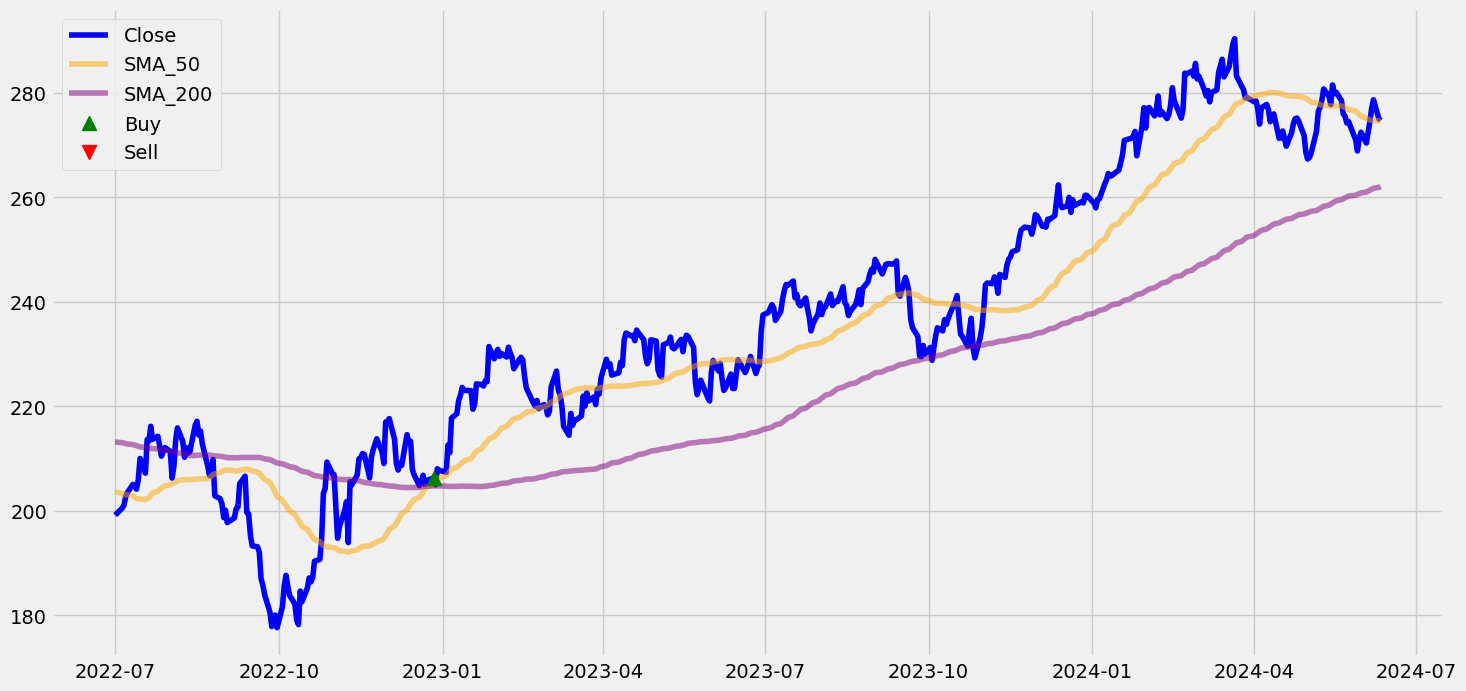

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

def get_stock_data(ticker: str, days: int) -> pd.DataFrame:

    # Calculate the start date based on the number of days
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch the data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data

# Example usage
ticker = "V"
days = 1000
stock_data = get_stock_data(ticker, days)

stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

stock_data['Signal'] = 0

#if the current 50 day SMA crossed below the current 200 day SMA and the previous 50 day SMA crossed above the previous SMA then sell (indicate =-1):
stock_data.loc[(stock_data['SMA_50'] <= stock_data['SMA_200']) & (stock_data['SMA_50'].shift(1) > stock_data['SMA_200'].shift(1)), 'Signal'] =-1

#if the current 50 day SMA crossed above the current 200 day SMA and the previous 50 day SMA crossed below the previous SMA then buy (indicate =1):
stock_data.loc[(stock_data['SMA_50'] >= stock_data['SMA_200']) & (stock_data['SMA_50'].shift(1) < stock_data['SMA_200'].shift(1)), 'Signal'] = 1

stock_data.dropna(inplace=True)

#plot the data
plt.figure(figsize=(16,8))
plt.plot(stock_data['Close'], label='Close', color='blue')
plt.plot(stock_data['SMA_50'], label='SMA_50', alpha=0.5, color='orange')
plt.plot(stock_data['SMA_200'], label='SMA_200', alpha=0.5, color='purple')

plt.plot(stock_data[stock_data['Signal']==1].index, stock_data['Close'][stock_data['Signal']==1], '^', color='g', markersize=10, label='Buy' )
plt.plot(stock_data[stock_data['Signal']==-1].index, stock_data['Close'][stock_data['Signal']==-1], 'v', color='red', markersize=10, label='Sell' )
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

def get_stock_data(ticker: str, days: int) -> pd.DataFrame:
    # Calculate the start date based on the number of days
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch the data using yfinance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    return stock_data


def get_doubleDeathCross(ticker, days):

    stock_data = get_stock_data(ticker, days)

    # Calculate SMAs
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

    # Generate buy/sell signals
    stock_data['Signal'] = 0

    # If the current 50-day SMA crossed below the current 200-day SMA and the previous 50-day SMA crossed above the previous SMA, then sell (indicate = -1)
    stock_data.loc[(stock_data['SMA_50'] <= stock_data['SMA_200']) & (stock_data['SMA_50'].shift(1) > stock_data['SMA_200'].shift(1)), 'Signal'] = -1

    # If the current 50-day SMA crossed above the current 200-day SMA and the previous 50-day SMA crossed below the previous SMA, then buy (indicate = 1)
    stock_data.loc[(stock_data['SMA_50'] >= stock_data['SMA_200']) & (stock_data['SMA_50'].shift(1) < stock_data['SMA_200'].shift(1)), 'Signal'] = 1

    stock_data.dropna(inplace=True)

    # Create the plotly figure
    fig = go.Figure()

    # Add the close price trace
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close', line=dict(color='blue')))

    # Add the SMA_50 trace
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['SMA_50'], mode='lines', name='SMA_50', line=dict(color='orange', dash='dash')))

    # Add the SMA_200 trace
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['SMA_200'], mode='lines', name='SMA_200', line=dict(color='purple', dash='dash')))

    # Add buy signals
    fig.add_trace(go.Scatter(x=stock_data[stock_data['Signal'] == 1].index,
                            y=stock_data['Close'][stock_data['Signal'] == 1],
                            mode='markers',
                            name='Buy',
                            marker=dict(symbol='triangle-up', color='green', size=20)))

    # Add sell signals
    fig.add_trace(go.Scatter(x=stock_data[stock_data['Signal'] == -1].index,
                            y=stock_data['Close'][stock_data['Signal'] == -1],
                            mode='markers',
                            name='Sell',
                            marker=dict(symbol='triangle-down', color='red', size=20)))

    # Update layout
    fig.update_layout(
        title=f'Stock Data for {ticker}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(x=0, y=1, traceorder='normal'),
        template='plotly_white',
        height=800,
        width=1200
    )

    # Show the plot
    fig.show()


[*********************100%%**********************]  1 of 1 completed
